<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EB%94%A5%ED%95%9C%EB%81%9D_9%EC%9E%A5_%ED%8C%A8%EC%85%98_MNIST_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

4422102/4422102 [==============================] - 1s 0us/step
전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [3]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [4]:
x_train = x_train / 255. # 정규화
x_val = x_val / 255.
x_test = x_test / 255.

In [5]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 [==============================] - 7s 66ms/step - loss: 2.1686 - accuracy: 0.3623 - val_loss: 2.0231 - val_accuracy: 0.3939
Epoch 2/60
83/83 [==============================] - 5s 54ms/step - loss: 1.8992 - accuracy: 0.5565 - val_loss: 1.7879 - val_accuracy: 0.5887
Epoch 3/60
83/83 [==============================] - 4s 54ms/step - loss: 1.6969 - accuracy: 0.6217 - val_loss: 1.6141 - val_accuracy: 0.6390
Epoch 4/60
83/83 [==============================] - 5s 57ms/step - loss: 1.5379 - accuracy: 0.6624 - val_loss: 1.4752 - val_accuracy: 0.6158
Epoch 5/60
83/83 [==============================] - 4s 52ms/step - loss: 1.4124 - accuracy: 0.6797 - val_loss: 1.3583 - val_accuracy: 0.6802
Epoch 6/60
83/83 [==============================] - 4s 49ms/step - loss: 1.3122 - accuracy: 0.6976 - val_loss: 1.2708 - val_accuracy: 0.6898
Epoch 7/60
83/83 [==============================] - 3s 31ms/step - loss: 1.2315 - accuracy: 0.7062 - val_loss: 1.1951 - val_accuracy: 0.7064
Epoch 8/60
83

In [8]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

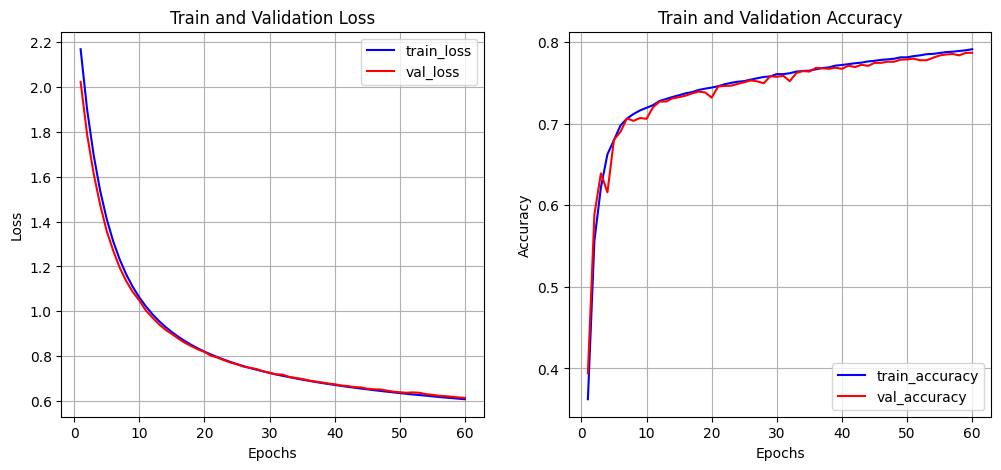

In [9]:
import matplotlib.pyplot as plt
import numpy as np
show_history(history)

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6264 - accuracy: 0.7791


[0.6264441609382629, 0.7791000008583069]

In [11]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [12]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

In [13]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 [==============================] - 1s 2ms/step
[1.2695789e-02 9.4322228e-01 3.9096982e-03 1.4985220e-02 1.9491060e-02
 4.2977368e-05 5.5475249e-03 2.2795435e-05 7.0803522e-05 1.1792173e-05]
1
Trouser


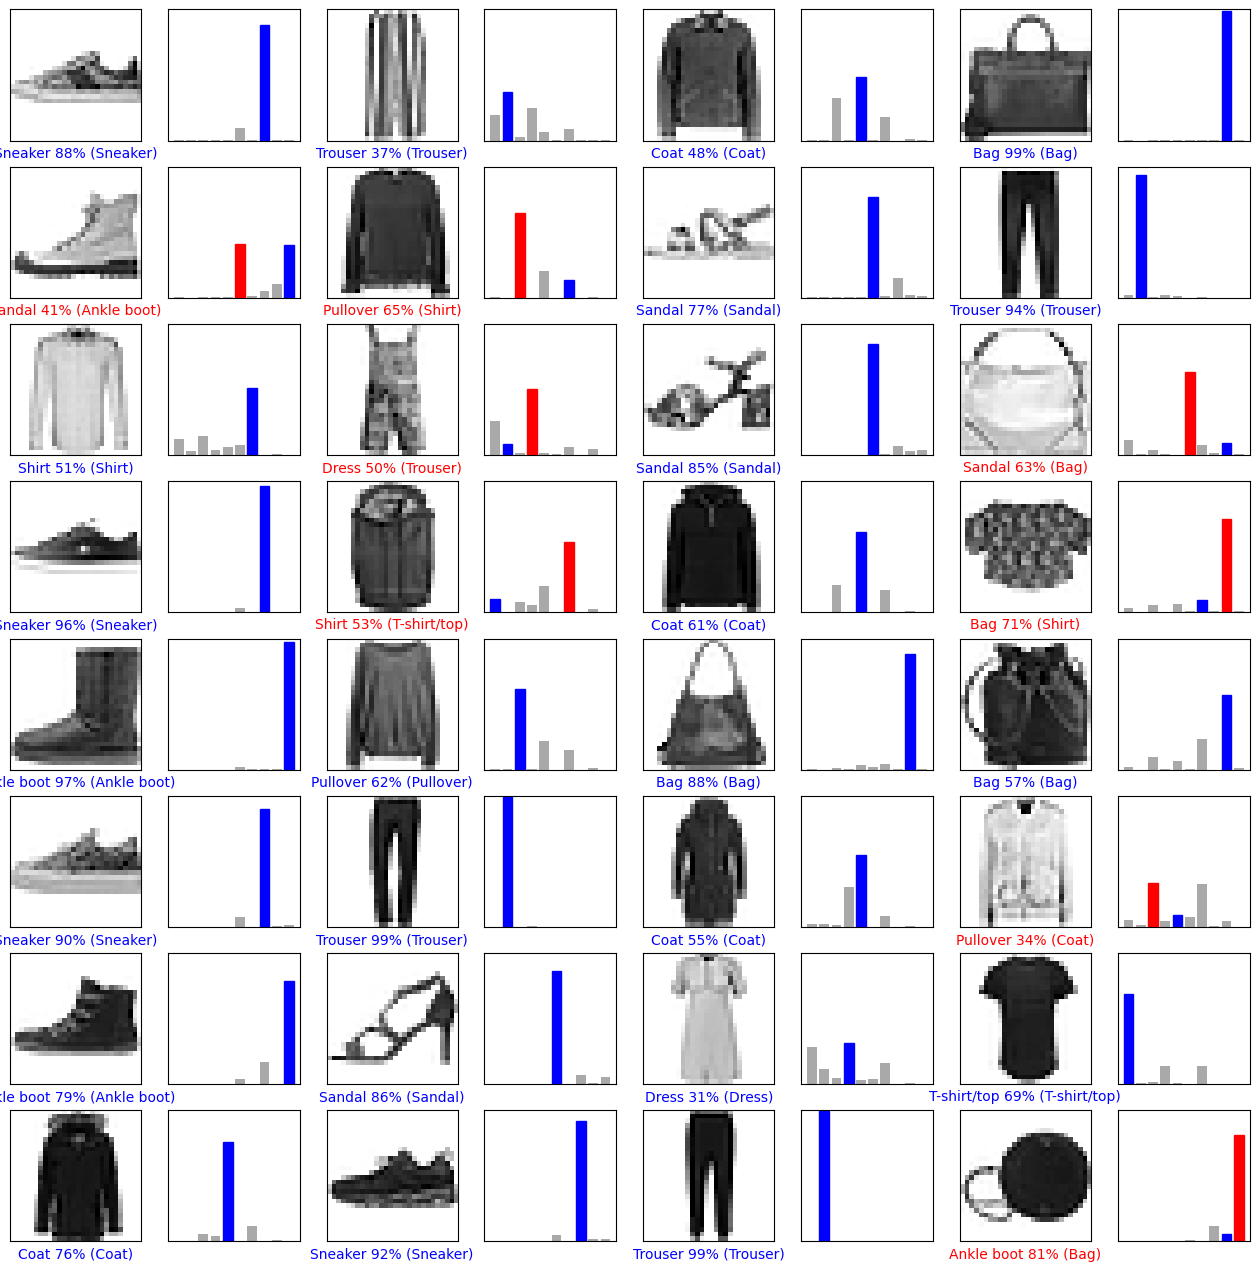

In [14]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [15]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.80      0.76      1000
     Trouser       0.97      0.92      0.95      1000
    Pullover       0.70      0.60      0.65      1000
       Dress       0.77      0.83      0.80      1000
        Coat       0.62      0.75      0.68      1000
      Sandal       0.84      0.82      0.83      1000
       Shirt       0.50      0.38      0.43      1000
     Sneaker       0.82      0.86      0.84      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.88      0.91      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



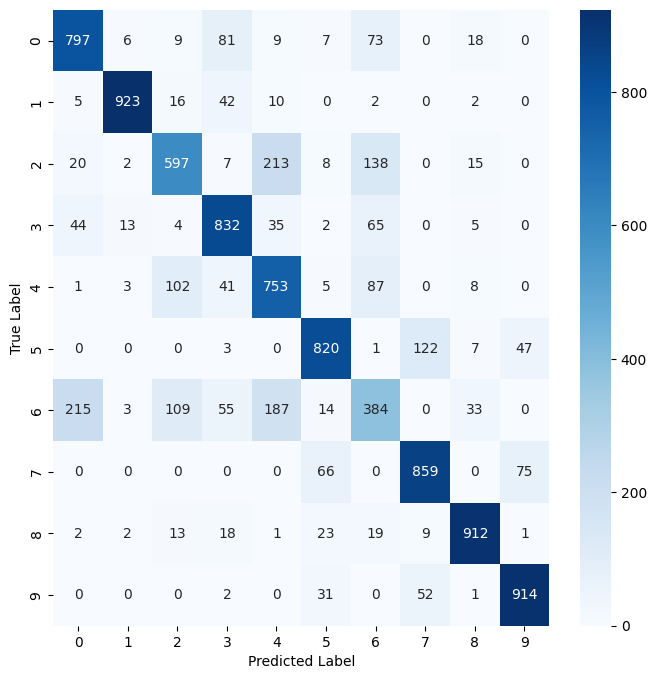

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 7s 6ms/step - loss: 0.5942 - accuracy: 0.7939 - val_loss: 0.5878 - val_accuracy: 0.7933
Epoch 2/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5666 - accuracy: 0.8025 - val_loss: 0.5663 - val_accuracy: 0.8041
Epoch 3/60
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5458 - accuracy: 0.8096 - val_loss: 0.5503 - val_accuracy: 0.8075
Epoch 4/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5293 - accuracy: 0.8143 - val_loss: 0.5351 - val_accuracy: 0.8145
Epoch 5/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.5163 - accuracy: 0.8191 - val_loss: 0.5237 - val_accuracy: 0.8164
Epoch 6/60
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5054 - accuracy: 0.8225 - val_loss: 0.5178 - val_accuracy: 0.8206
Epoch 7/60
1313/1313 [==============================] - 10s 7ms/step - loss: 0.4961 - accuracy: 0.8270 - val_loss: 0.5038 - val_accuracy

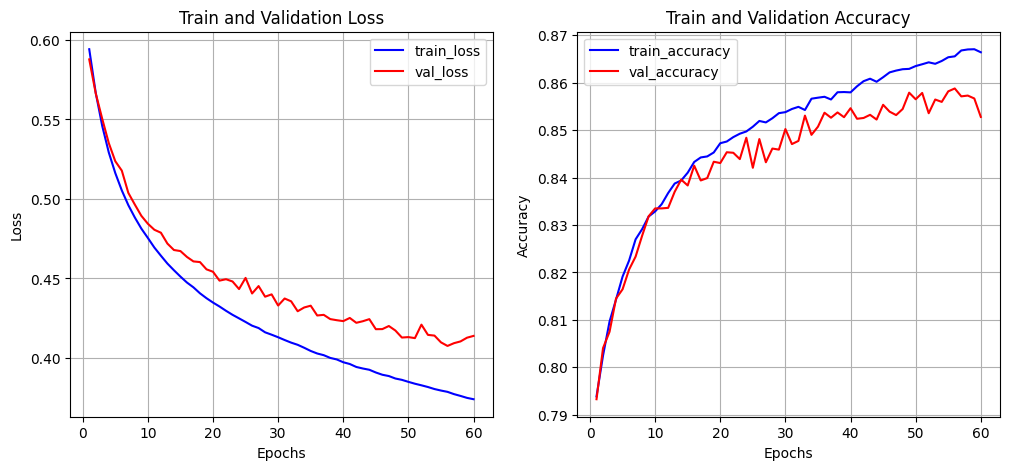

In [18]:
show_history(history)

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4328 - accuracy: 0.8421


[0.4327986240386963, 0.8421000242233276]

In [20]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu')) # 활성화 함수 sigmoid -> ReLU로 변경
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.7720 - accuracy: 0.7553 - val_loss: 0.5810 - val_accuracy: 0.8133
Epoch 2/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5330 - accuracy: 0.8220 - val_loss: 0.5036 - val_accuracy: 0.8312
Epoch 3/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4821 - accuracy: 0.8340 - val_loss: 0.4707 - val_accuracy: 0.8417
Epoch 4/60
1313/1313 [==============================] - 7s 5ms/step - loss: 0.4551 - accuracy: 0.8415 - val_loss: 0.4506 - val_accuracy: 0.8476
Epoch 5/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4352 - accuracy: 0.8492 - val_loss: 0.4720 - val_accuracy: 0.8308
Epoch 6/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4202 - accuracy: 0.8543 - val_loss: 0.4571 - val_accuracy: 0.8427
Epoch 7/60
1313/1313 [==============================] - 7s 5ms/step - loss: 0.4085 - accuracy: 0.8592 - val_loss: 0.4705 - val_accuracy:

In [22]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

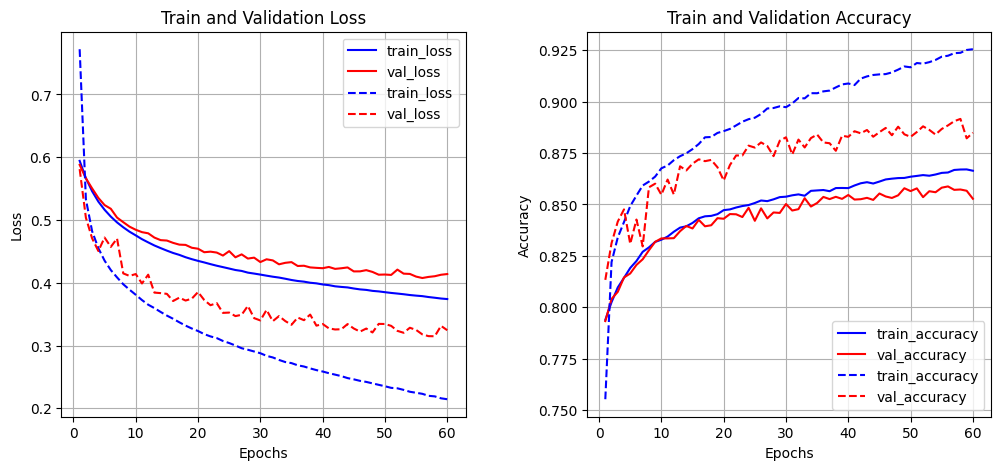

In [23]:
diff_history(history, history2)

In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3496 - accuracy: 0.8768


[0.3496047258377075, 0.876800000667572]

In [25]:
# 직접 코드를 입력해보세요
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', # 옵티마이저 변경 SGD -> adam
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 12s 9ms/step - loss: 0.5036 - accuracy: 0.8194 - val_loss: 0.4258 - val_accuracy: 0.8456
Epoch 2/60
1313/1313 [==============================] - 11s 8ms/step - loss: 0.3754 - accuracy: 0.8616 - val_loss: 0.4112 - val_accuracy: 0.8499
Epoch 3/60
1313/1313 [==============================] - 11s 9ms/step - loss: 0.3381 - accuracy: 0.8753 - val_loss: 0.3718 - val_accuracy: 0.8654
Epoch 4/60
1313/1313 [==============================] - 11s 9ms/step - loss: 0.3104 - accuracy: 0.8846 - val_loss: 0.3417 - val_accuracy: 0.8783
Epoch 5/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2897 - accuracy: 0.8908 - val_loss: 0.3352 - val_accuracy: 0.8806
Epoch 6/60
1313/1313 [==============================] - 12s 9ms/step - loss: 0.2747 - accuracy: 0.8980 - val_loss: 0.3557 - val_accuracy: 0.8752
Epoch 7/60
1313/1313 [==============================] - 11s 8ms/step - loss: 0.2618 - accuracy: 0.9020 - val_loss: 0.3248 - val_ac

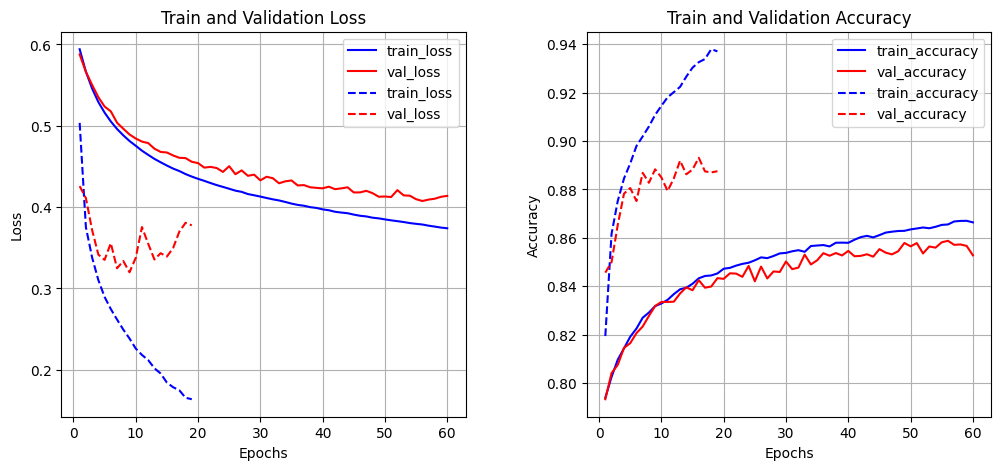

In [27]:
diff_history(history, history3)

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8793


[0.3405412435531616, 0.8792999982833862]

In [29]:
from tensorflow.keras import models, layers, utils, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2())) # L2 규제 적용
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [30]:
history4 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 9s 7ms/step - loss: 5.6517 - accuracy: 0.7520 - val_loss: 4.3271 - val_accuracy: 0.8102
Epoch 2/60
1313/1313 [==============================] - 10s 7ms/step - loss: 3.4804 - accuracy: 0.8171 - val_loss: 2.7847 - val_accuracy: 0.8208
Epoch 3/60
1313/1313 [==============================] - 8s 6ms/step - loss: 2.2800 - accuracy: 0.8298 - val_loss: 1.8793 - val_accuracy: 0.8253
Epoch 4/60
1313/1313 [==============================] - 8s 6ms/step - loss: 1.5719 - accuracy: 0.8343 - val_loss: 1.3548 - val_accuracy: 0.8259
Epoch 5/60
1313/1313 [==============================] - 8s 6ms/step - loss: 1.1514 - accuracy: 0.8398 - val_loss: 1.0208 - val_accuracy: 0.8338
Epoch 6/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.8994 - accuracy: 0.8418 - val_loss: 0.8206 - val_accuracy: 0.8448
Epoch 7/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.7492 - accuracy: 0.8441 - val_loss: 0.7547 - val_accuracy

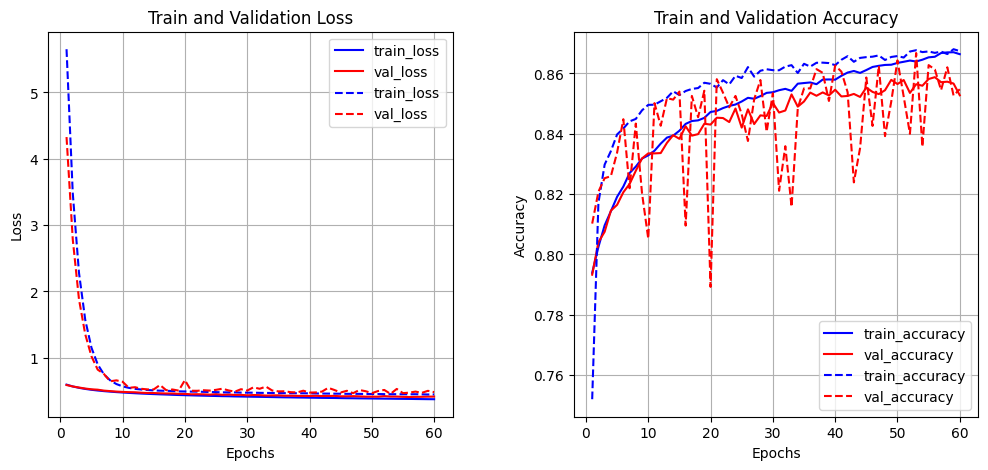

In [31]:
diff_history(history, history4)

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5046 - accuracy: 0.8407


[0.5046457648277283, 0.8406999707221985]

In [33]:
from tensorflow.keras import models, layers, optimizers, utils, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
#model.add(layers.Dropout(0.5)) # 드롭아웃 추가
#model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2()))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [34]:
history5 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.8631 - accuracy: 0.7123 - val_loss: 0.5995 - val_accuracy: 0.8057
Epoch 2/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.6020 - accuracy: 0.7966 - val_loss: 0.5310 - val_accuracy: 0.8246
Epoch 3/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5367 - accuracy: 0.8172 - val_loss: 0.4852 - val_accuracy: 0.8376
Epoch 4/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5047 - accuracy: 0.8264 - val_loss: 0.4628 - val_accuracy: 0.8436
Epoch 5/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4801 - accuracy: 0.8327 - val_loss: 0.4471 - val_accuracy: 0.8477
Epoch 6/60
1313/1313 [==============================] - 7s 6ms/step - loss: 0.4580 - accuracy: 0.8425 - val_loss: 0.4348 - val_accuracy: 0.8506
Epoch 7/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.4439 - accuracy: 0.8440 - val_loss: 0.4239 - val_accuracy:

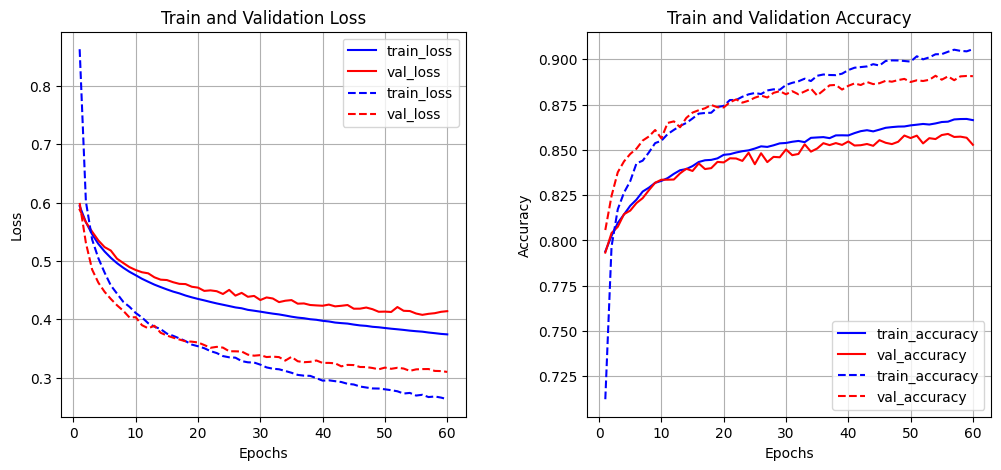

In [35]:
diff_history(history, history5)

In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3301 - accuracy: 0.8826


[0.33005067706108093, 0.8826000094413757]

In [37]:
from tensorflow.keras import models, layers, optimizers, utils, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 412,234
Trainable params: 409,642
Non-trainable params: 2,592
_________________________________________________________________


In [38]:
history6 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 14s 10ms/step - loss: 0.5194 - accuracy: 0.8170 - val_loss: 0.4297 - val_accuracy: 0.8477
Epoch 2/60
1313/1313 [==============================] - 12s 10ms/step - loss: 0.3897 - accuracy: 0.8606 - val_loss: 0.3769 - val_accuracy: 0.8694
Epoch 3/60
1313/1313 [==============================] - 12s 9ms/step - loss: 0.3467 - accuracy: 0.8764 - val_loss: 0.3758 - val_accuracy: 0.8700
Epoch 4/60
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3221 - accuracy: 0.8834 - val_loss: 0.3513 - val_accuracy: 0.8789
Epoch 5/60
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3039 - accuracy: 0.8902 - val_loss: 0.3496 - val_accuracy: 0.8787
Epoch 6/60
1313/1313 [==============================] - 12s 9ms/step - loss: 0.2855 - accuracy: 0.8967 - val_loss: 0.3398 - val_accuracy: 0.8820
Epoch 7/60
1313/1313 [==============================] - 12s 9ms/step - loss: 0.2711 - accuracy: 0.9024 - val_loss: 0.3458 - va

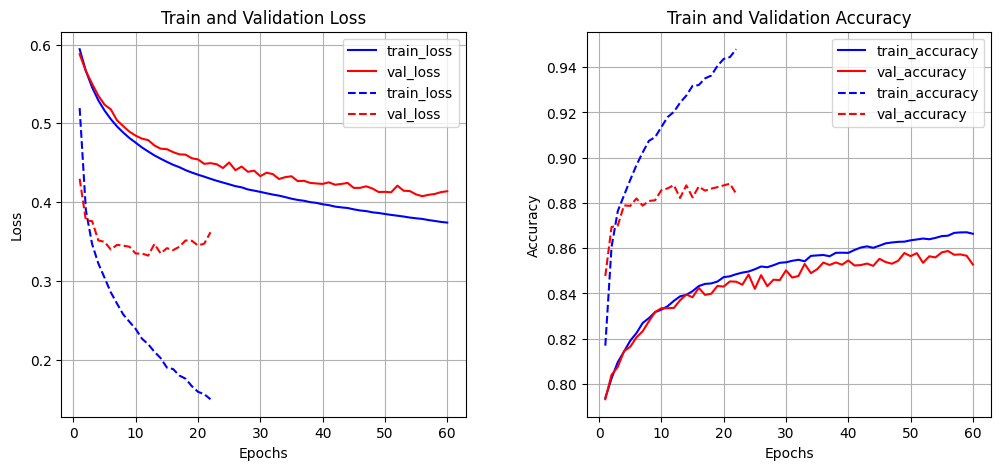

In [39]:
diff_history(history, history6)

In [40]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3578 - accuracy: 0.8752


[0.35784855484962463, 0.8751999735832214]

In [41]:
from tensorflow.keras import models, layers, optimizers, utils, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 412,234
Trainable params: 409,642
Non-tr

In [42]:
history7 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 16s 11ms/step - loss: 0.6928 - accuracy: 0.7599 - val_loss: 0.4493 - val_accuracy: 0.8414
Epoch 2/60
1313/1313 [==============================] - 13s 10ms/step - loss: 0.5139 - accuracy: 0.8164 - val_loss: 0.4120 - val_accuracy: 0.8566
Epoch 3/60
1313/1313 [==============================] - 15s 11ms/step - loss: 0.4665 - accuracy: 0.8324 - val_loss: 0.3931 - val_accuracy: 0.8613
Epoch 4/60
1313/1313 [==============================] - 13s 10ms/step - loss: 0.4405 - accuracy: 0.8439 - val_loss: 0.3802 - val_accuracy: 0.8658
Epoch 5/60
1313/1313 [==============================] - 13s 10ms/step - loss: 0.4276 - accuracy: 0.8470 - val_loss: 0.3726 - val_accuracy: 0.8684
Epoch 6/60
1313/1313 [==============================] - 13s 10ms/step - loss: 0.4071 - accuracy: 0.8531 - val_loss: 0.3605 - val_accuracy: 0.8716
Epoch 7/60
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3992 - accuracy: 0.8557 - val_loss: 0.3575 -

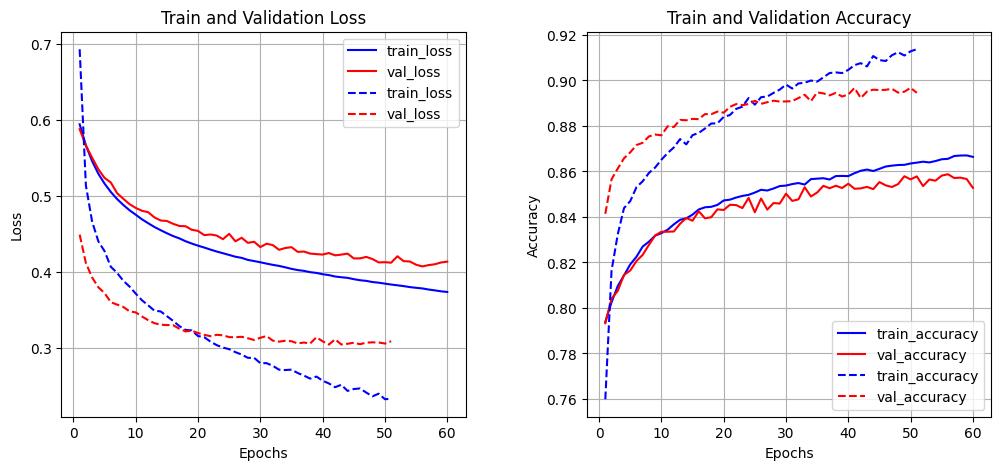

In [43]:
diff_history(history, history7)

In [44]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.8855


[0.32953324913978577, 0.8855000138282776]

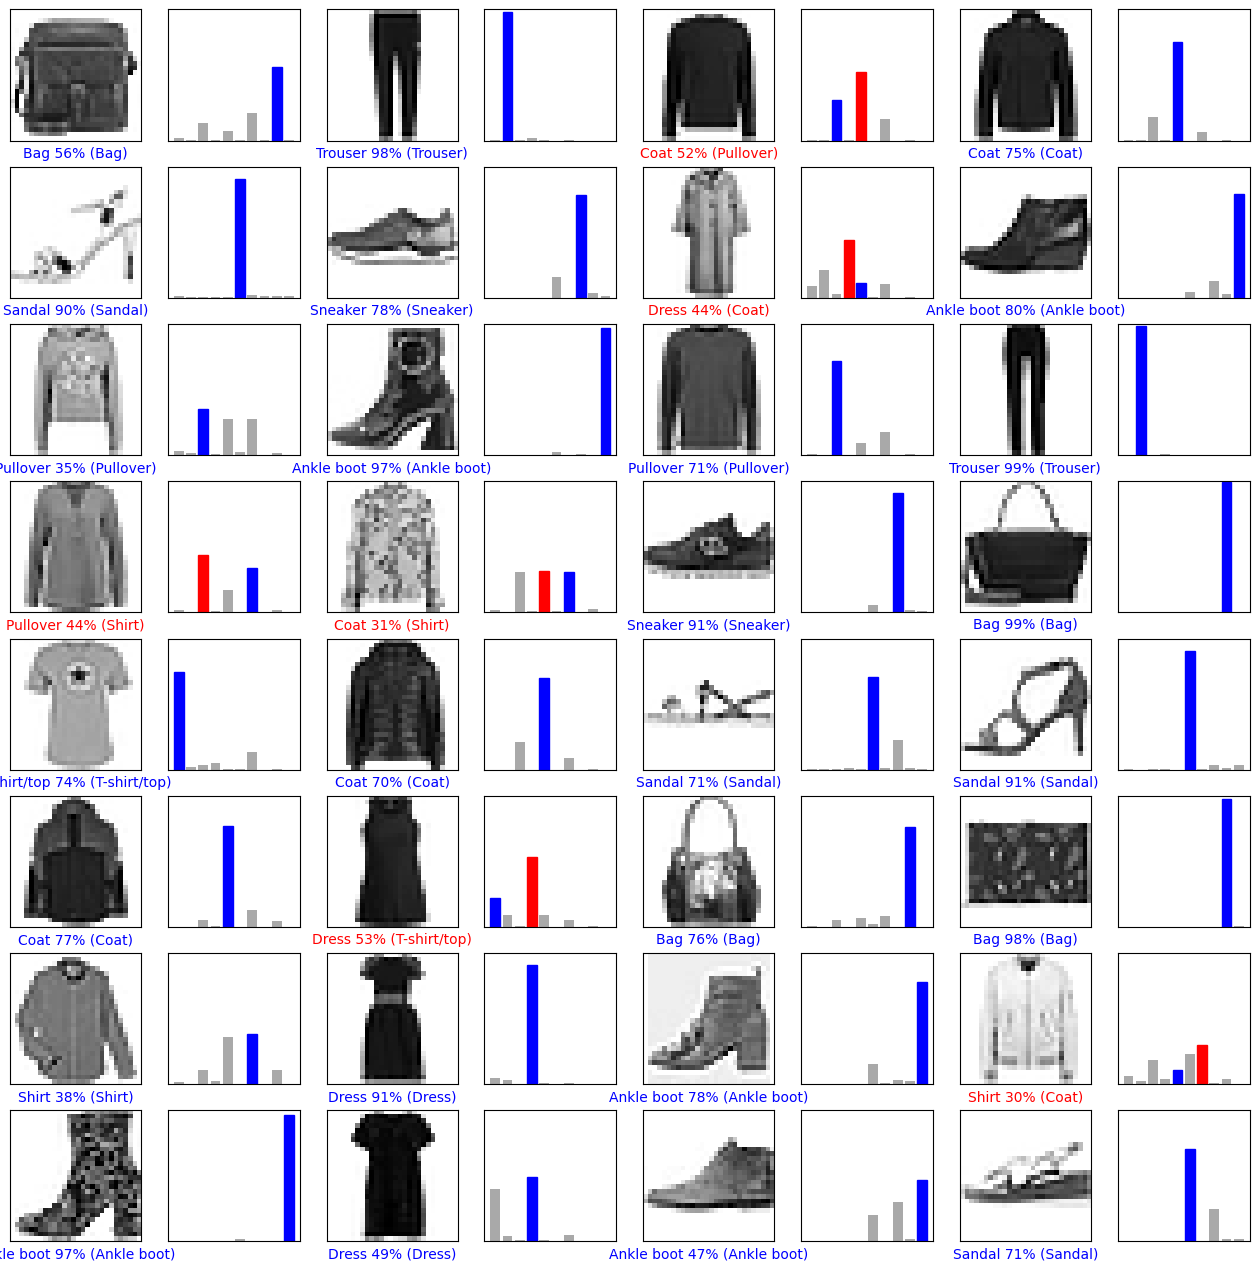

In [45]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [46]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.80      0.76      1000
     Trouser       0.97      0.92      0.95      1000
    Pullover       0.70      0.60      0.65      1000
       Dress       0.77      0.83      0.80      1000
        Coat       0.62      0.75      0.68      1000
      Sandal       0.84      0.82      0.83      1000
       Shirt       0.50      0.38      0.43      1000
     Sneaker       0.82      0.86      0.84      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.88      0.91      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



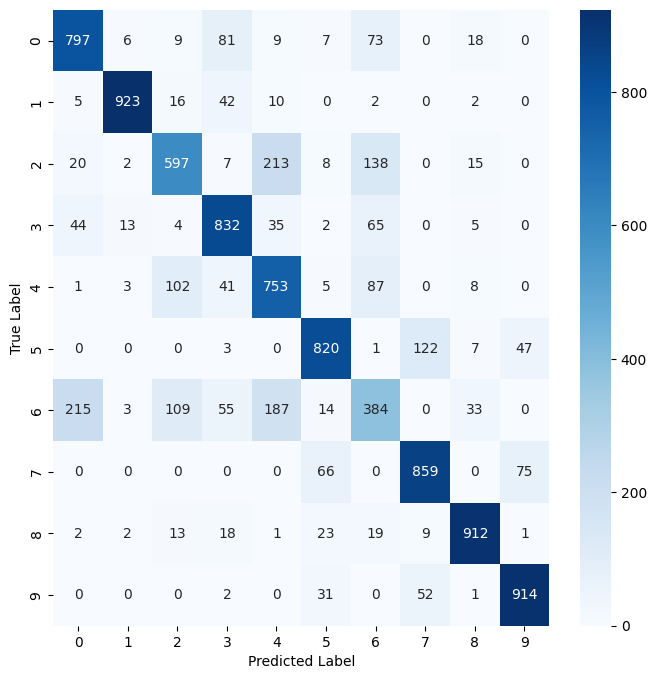

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()